# Tutorial 6: More pandas and intro to machine learning

_BS1819 Data Structures and Algorithms, September 2018_

_Imperial College Business School_


---
In the previous tutorial, we started working on the _pandas_ data analysis library. In this tutorial, we will briefly go through some of its more advanced features. The optional part of the tutorial provides a teaser to machine learning with a brief introduction to the popular _scikit learn_ library.

---

## Submission

There are no OK tests or required submission for this tutorial. 

## More Titanic

The tutorial folder contains the files `titanic.csv` and `nationalities.csv`. The latter file contains nationalities of Titanic passengers. Note that this file was created solely for the purpose of learning within this course, and should not be used outside of the scope of the course. It does **not** reflect the real nationalities of the passengers.

Load the files titanic.csv and nationalities.csv in the variables `data_org` and `data_nat` respectively. Use the cell below as instructed.

In [19]:
import pandas as pd

In [20]:
# Reads the file titanic.csv
data_org = pd.read_csv('titanic.csv')

# Reads the file nationalities.csv
data_nat = pd.read_csv('nationalities.csv')

## Advanced pandas dataframe processing

When working on data analysis, we often need to combine information from different sources, or produce our own data and then combine them with other sources. The pandas library offers a great deal of methods to facilitate this process. We will study below the functionality of merging datasets. We will merge the titanic.csv (original file) and the nationalities.csv (data produced by our research). 

Before merging two datasets, we need to know exactly how these datasets are related, how they are structured and whether they already have some common fields.

In [21]:
# # First, let's ensure that the two datasets have the same number of elements (passenger data).
assert data_org.shape[0] == data_nat.shape[0]

In [22]:
# # Let's print the heads of the two datasets to figure out if there are any common elements.
data_org.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data_nat.head(5)

,PassengerId,Nationality
0,1,Swede
1,2,Austro Hungarian
2,3,Swede
3,4,Belgian
4,5,Swede


In [33]:
# # We are ready to perform the merging. Observe that the datasets share a common column in
# # the PassengerId, so we will use it to combine the data.
data_new = data_org.merge(data_nat, on='PassengerId')

# # Let's see what we've created now.
data_new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Swede
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Austro Hungarian
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Swede
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Belgian
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Swede


In [34]:
# # Pandas offers several convenient methods for conditional selection and actions on them.
# # For instance, in the previous tutorial, we worked on getting useful aggregate statistics
# # over the whole dataset (do you remember the commands?).
# # However, often we'd like to select only a subset of the data based on some condition. 
# # For instance, let's say we would like to print the average age per class.
# # One way to do that would be to iterate over all the elements, create a list, sum them 
# # and then compute the average. 
# # But pandas conveniently allows us to do it with a single command. 
# # It works as follows: 
# # First we group the data by the class, then we ask pandas to compute the mean of the age.
print(data_new.groupby(['Pclass'])['Age'].mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [35]:
# # In the command above, we've averaged both men and women based only on the Pclass.
# # However, we could separate the two sexes and compute the mean for each sex.
print(data_new.groupby(['Pclass', 'Sex'])['Age'].mean())

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


You might have noted that in class three, the average age of each sex differs significantly with the mean being closer to the male average age. Intuitively, you expect to find more men in that class than women. However, what is the command to find the exact number of males in this class? 

In [36]:
# # We will now drop few columns that contain strings to mention few methods for statistical processing.
data = data_new.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'Nationality', 'Sex'], axis=1)

In [37]:
# # As we've seen, pandas bundles much of the functionality of numpy and lists.
# # We can for example "clip" the values, i.e. restrict them in a chosen interval.
# # Notice that some values were greater than our upper bound, but are now
# # restricted to the maximum upper bound we set.
data.clip(lower=0, upper=40).head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.250
1,2.0,1.0,1.0,38.0,1.0,0.0,40.000
2,3.0,1.0,3.0,26.0,0.0,0.0,7.925
3,4.0,1.0,1.0,35.0,1.0,0.0,40.000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.050


In [38]:
# # If the method we would like to apply to the data does not exist, we can use the 
# # '.apply' method that allows us to choose any function to be applied to each record.
# # One way to do this is through an "anonymous" lambda function.
# # This works as defining a function without an explicit name to apply to each record
import numpy as np
data["SurvivedPlusOne"] = data["Survived"].apply(lambda x: x + 1)
data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SurvivedPlusOne
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,2
2,3,1,3,26.0,0,0,7.9250,2
3,4,1,1,35.0,1,0,53.1000,2
4,5,0,3,35.0,0,0,8.0500,1


**Exercise**. Who survived? Use the aggregation functions above to calculate survival probabilities based on fare classes, age, or fare paid.


This has been a very brief introduction to data aggregation in pandas. For many more useful methods, see

- VanderPlas, Jake. Python Data Science Handbook: https://github.com/jakevdp/PythonDataScienceHandbook
- Reda, Greg. Intro to pandas data structures: http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
- Evans, Julia. Pandas cookbook: https://github.com/jvns/pandas-cookbook
- Augsburger, Tom. Modern pandas. http://tomaugspurger.github.io/modern-1.html


## Extra topic: Introduction to Machine Learning

#### Introduction

We can think of Machine Learning (ML) as a way to simulate a function. Not necessarily a function with the strict mathematical sense of calculus courses, but rather a function that maps some (optional) input to some output. 

For instance, translating English to German can be thought as a function that maps text in the English language to the respective text into German. Let's think about that for a minute: The naive approach is to translate word by word, e.g. having a python dictionary with keywords the english words and the respective value to be a german word. However, this approach would lose most of the language's syntax, the connections and the higher level representations of the text. Machine-learning based translation tools seek to bridge this cap and are a very active field in Machine Learning research. 

Machine Learning approaches typically use some **tunable parameters** (typically an array of floating point values) that are adjusted (learnt) so as to improve their behaviour by **adapting to previously seen data.**

Depending on the ML application, you can have different dimensions of data. For example, in image processing, they typically deal with 2D arrays of shape  ``[n_samples x n_features]``. The number of features is the same for each object, and each feature column refers to a related piece of information about each sample. In financial analysis, you also deal with 2D arrays where n_features would be the number of observations in a time series, e.g. the stock price of a company for the past several years. The different samples would then refer to different companies. 

Machine-learning methods are often divided into *supervised learning* and *unsupervised learning*.

Supervised learning relies on having some labelled sample data as input, and training a model to analyse new instances of related data. For example, we might have pictures of different individuals and label each picture with the person who's in the photo, and then train an algorithm to classify new pictures. 

Unsupervised learning, in contrast, does not require any labelled samples to learn. With the photos, we might instead use unsupervised learning to try to divide our pictures into groups of different people without any upfront labelling. 

---

#### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of different **features and labels**.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. Some examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).
- given observations from a site (e.g. sensors' input), figure out
  whether the facility works as predicted or there are 
  some disruptions (this task is alleged "anomaly detection").

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

---

Both regression and classification are some tasks essential in several fields that require data analysis (e.g. financial analysis). Some examples are:
- given historical observations of the house market prices, predict the future values.
- given the offers (for outsourcing product $y$ creation) from $v$ different companies, decide with which company to collaborate. 
- given a history of stock market prices, predict whether there is a disruptive event at some time $t$. 

There are no tests for these exercises.

** Exercise. ** What type of problem (classification/regression) is the one with house market prices?

** Exercise. ** What about the offers for outsourcing the product creation?

** Exercise. ** What type of problem is the prediction of disruptive events in stock market?

#### Scikit learn
We'll use a popular machine-learning library called **Scikit learn**. 
You can start using scikit straight away, as the API is intuitive and well documented. They also offer a plethora of more advanced options if you want to customise the parameters of the optimisation problem.

In this tutorial, we focus on regression.  We'll begin with the most standard regression setting: the linear regression one.

In [1]:
# # We import only the LinearRegression class.
from sklearn.linear_model import LinearRegression
import numpy as np
# # Import the modules for printing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # If you want to check out the documentation, 
# # you can call help().
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional
 |      whether to calculate the intercept for this model. If set
 |      to false, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      If True, the regressors X will be normalized before regression.
 |      This parameter is ignored when `fit_intercept` is set to False.
 |      When the regressors are normalized, note that this makes the
 |      hyperparameters learnt more robust and almost independent of the number
 |      of samples. The same property is not valid for standardized data.
 |      However, if you wish to standardize, please use
 |      `preprocessing.StandardScaler` before calling `fit` on an estimator
 |      with

In [3]:
# # Let's initialise a new Linear Regression model.
model = LinearRegression(normalize=True)

In [4]:
# # In most python libraries, you can print the objects and
# # acquire information about their class/parameters.
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


#### Elaborate on 'Parameters', please...
At this point, we should clarify the use of the term **parameters**. 

In the `help` command a few cells above, you might have noticed that under the title 'Parameters' are the arguments of the class. Those are the programming parameters, provided by the programmer. Those are often called **hyper-parameters**. 

However, when we mentioned above that ML applications include parameters that are learnt, we did not mean the hyper-parameters that are decided (semi-)automatically. What we meant with **tunable parameters** were the model's parameters. Every model requires different parameters, e.g. a simple linear regression of 1D data has the following two parameters: the slope and the intercept.

In [5]:
# # starting from some toy data to get familiar with the concepts:
X = np.array([[0],
              [1],
              [2]]) # A 2D array with 3 samples of 1 feature each
y = np.array([[0, 1, 2 ]]).T # What we want to predict as a function of X
# # Hint: This is the identity function.

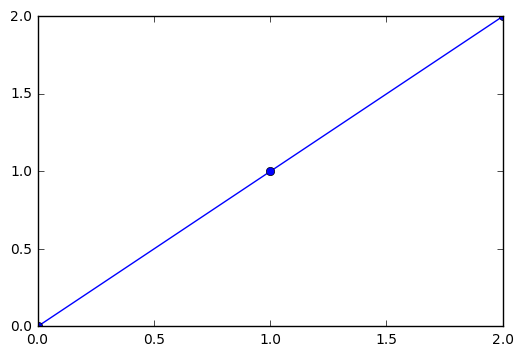

In [6]:
# # Let's plot to verify that we've defined the identity function.
_ = plt.plot(X[:, 0], y, marker='o')

In [7]:
# # Let's fit the Linear regression model we've defined above.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [8]:
# # It was that simple. We call the method fit, provide 
# # the training samples and the model "learns" the parameters.
# # Let's now print the coefficient learnt for this case:
model.coef_

array([[ 1.]])

---

Now, it's time to move to a more useful example. We will be given some samples X (1D) and try to estimate the linear line that created them. 

In [9]:
# # The seed below is significant for reproducible results.
np.random.seed(0)

X = np.random.random(size=(20, 1))
y = 3 * X[:, 0] + 2 + np.random.normal(size=20)

In [10]:
# # Fit linear regression to it.
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
m1 = 'Model coefficient: {}, and intercept: {}'
print(m1.format(model.coef_, model.intercept_))

Model coefficient: [ 3.93491126], and intercept: 1.462290789039339


In [11]:
# # Let's now generate some new samples (UNSEEN in the training)
# # and use those to predict the y values.
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

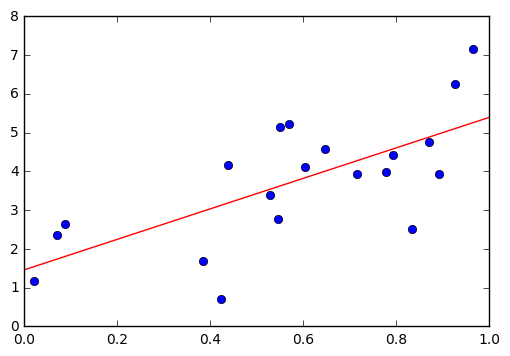

In [20]:
# Let's plot with blue dots the 'training' points, while with a red line the
# estimated line.
plt.plot(X, y, 'bo')
plt.plot(X_test, y_test, 'r')

What happens if you increase the number of training points from 100 to 10K?

#### A recap on Scikit-learn's estimator interface

As you have observed, scikit-learn provides a uniform interface across all methods.In the case of regression, the main functions you will need are:

+ `model.fit()` : fit training data. For supervised learning applications,
this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
For unsupervised learning applications, this accepts only a single argument,
the data `X` (e.g. `model.fit(X)`).
+ `model.predict()` : given a trained model, predict the label of a new set of data.
This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
and returns the learned label for each object in the array.
+ `model.score()` : for classification or regression problems, most (all?) estimators implement
a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.


We've now seen how to fit a standard linear regression model with scikit-learn. For statistical analysis, such as hypothesis testing, we would often use another library called [statsmodels](http://www.statsmodels.org/stable/index.html).

Now, let's work through a machine-learning application with the Titanic dataset.

### Machine learning task: Predict survival

We will employ the Titanic data to predict the chance of survival of the passengers. In other words, the goal of the this part is to predict whether a passenger survived based on other known attributes. This is a very brief introduction and we will not go through all details of the models. When you see a model or a command you're not familiar with, it's a good idea to try to search online for what it does.

In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('titanic.csv')

In [24]:
survived_column = data['Survived']
survived_column.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In other words, the value is 1 if the person survived, 0 otherwise.

In [25]:
# Let's use the groupby as we used it above to get the survivors per category:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [26]:
np.mean(survived_column == 1)

0.38383838383838381

In other words, ~38% of the people survived. Let's convert the values of survived into a numpy arrays (input to scikit-learn).

`sklearn` estimators all work with homegeneous numerical feature descriptors passed as a numpy array. Therefore passing the raw data frame will not work out of the box.

Let us start simple and build a first model that only uses readily available numerical features as input, namely `data.Fare`, `data.Pclass` and `data.Age`.

In [29]:
target = survived_column.values
numerical_features = data[['Fare', 'Pclass', 'Age']]
numerical_features.head(10)

,Fare,Pclass,Age
0,7.2500,3,22.0
1,71.2833,1,38.0
2,7.9250,3,26.0
3,53.1000,1,35.0
4,8.0500,3,35.0
5,8.4583,3,NaN
6,51.8625,1,54.0
7,21.0750,3,2.0
8,11.1333,3,27.0
9,30.0708,2,14.0


A slight issue is that passenger 6 has an age 'NaN', which will not be recognised from sklearn. In general, the first step of any machine learning application is to pre-process the data. 

Typically, the data are (un)normalised, in a different format than your library requires them, etc. So, you will need to take care that they include the right values at first, otherwise you might end up spending hours trying to understand why the trained models return non-sensical results. 

In [30]:
median_features = numerical_features.dropna().median()
median_features

Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

Now use this value to replace the missing ones:

In [31]:
imputed_features = numerical_features.fillna(median_features)
imputed_features.count()

Fare      891
Pclass    891
Age       891
dtype: int64

Now that the data frame is clean, we can convert it into an homogeneous numpy array of floating point values:

In [32]:
features_array = imputed_features.values

We have 891 samples: let us keep 700 for training our model and the rest to test the quality of said model

In [33]:
X_train = features_array[:700, :]
X_test = features_array[700:, :]

In [34]:
# It's always a good idea to verify that your data have the expected shape
print(X_train.shape)
print(X_test.shape)

(700, 3)
(191, 3)


In [35]:
y_train = target[:700]
y_test = target[700:]

Now we can finally apply a regression model! We'll use [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), common for modelling binary data such as survivals.

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
target_predicted = logreg.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, target_predicted)

0.72774869109947649

72 percent accuracy, not **too** bad...

### Model evaluation and interpretation

#### Interpreting linear model weights

The `coef_` attribute of a fitted linear model such as `LogisticRegression` holds the weights of each features:

In [40]:
feature_names = numerical_features.columns
feature_names

Index(['Fare', 'Pclass', 'Age'], dtype='object')

In [41]:
logreg.coef_

array([[ 0.00340844, -0.80203374, -0.03071402]])

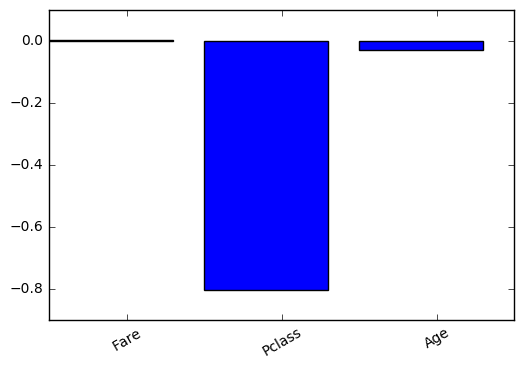

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
_ = plt.xticks(x + 0.5, feature_names, rotation=30)

In this case, survival is slightly positively linked with Fare (the higher the fare, the higher the likelyhood the model will predict survival) while passenger from first class and lower ages are predicted to survive more often than older people from the 3rd class.

First-class cabins were closer to the lifeboats and children and women reportedly had the priority. Our model seems to capture that historical information. 

That's your first machine-learning algorithm. Even though you can build much more powerful models, standard linear (or logistic) regression is often remarkably effective for providing an understanding of the complexity of your data. That is, if this error is already quite small with the linear regression model, then you might as well use that.

For a much more detailed introduction to machine learning in Python, see
- The Python Data Science Handbook, Chapter 5, https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.00-Machine-Learning.ipynb
